<a href="https://colab.research.google.com/github/SouvikChakraborty472/Web_Scraping_of_timesjobs/blob/main/Web_Scraping_of_timesjob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploring Data Science Job Opportunities 🔍🚀**

Your mission is to design a specialized tool that extracts and analyzes data science job listings from a single online source of your choice. Focus on crafting a laser-focused web scraping solution tailored to the chosen platform, ensuring the collection of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.

### **Key Tasks:**

1. **Source Selection:**
Choose a preferred online platform for data science job listings. Platforms like TimesJobs, LinkedIn Jobs, Indeed, Naukri, Glassdoor are potential options. Specify your chosen source in your solution. 🎯
2. **Web Scraping Precision:**
Engineer a targeted web scraping mechanism adept at extracting specific information from the chosen platform. ⚙️
3. **Data Extraction:**
Focus on extracting essential details from job listings, including but not limited to job titles, company names, required experience levels, salary ranges, and locations. 📊
4. **Data Organization:**
Ensure efficient organization and cleaning of the extracted data. The emphasis should be on presenting the information in a clear and understandable format.🧹
5. **Insights Generation:**
Develop tools for analyzing the gathered data to generate insights. Explore patterns related to job titles, experience requirements, salary distributions, and geographic preferences. 🔍
6. **Visualization:**
Create visual representations such as charts and graphs to communicate the insights effectively. Your visuals should provide a user-friendly interpretation of the data. 📈

#Web Scraping

In [ ]:
import csv
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
def get_record(card):
    atag = card.h2.a
    job_title = card.find("a").text.strip()
    job_url = 'https://www.timesjobs.com' + atag.get('href')
    company = card.find('h3', 'joblist-comp-name').text.strip().split('\r')[0]
    job_location = card.find('ul').text.strip().split('\n')[-1]
    salary = card.find('ul').text.strip().split('\n')[1]
    experience = card.find('li').text.strip().split('card_travel')[-1]

    record = (job_title,company,job_location,experience,salary,job_url)

    return record

In [ ]:
url = "https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=as&searchTextText=%22Data+Scientist%22&txtKeywords=%22Data+Scientist%22&txtLocation="
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
cards = soup.find_all('li', 'clearfix job-bx wht-shd-bx')
card = cards[0]

In [ ]:
records = []
for card in cards:
    record = get_record(card)
    records.append(record)

#Data Extraction

In [ ]:
with open('result.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['JobTitle', 'Company', 'Location', 'Experience', 'Salary', 'URL'])
        writer.writerows(records)

#Data Organization

In [ ]:
data = pd.read_csv("/content/result.csv")
data.head()

,JobTitle,Company,Location,Experience,Salary,URL
0,Lead Data Scientist,Araca Solutions\n (More Jobs),Bengaluru / Bangalore,6 - 12 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...
1,Data Scientist abroad jobs,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Dubai, Australia, Germany, New Zealand",2 - 7 yrs,₹Rs 19.10 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
4,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Agra, Aligarh, Allahabad, Bareilly, Faizabad",4 - 9 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...


In [ ]:
data.columns

Index(['JobTitle', 'Company', 'Location', 'Experience', 'Salary', 'URL'], dtype='object')

In [ ]:
data.isnull().sum()

JobTitle       0
Company        0
Location       0
Experience     0
Salary        14
URL            0
dtype: int64

In [ ]:
data.fillna('Not Mentioned')

,JobTitle,Company,Location,Experience,Salary,URL
0,Lead Data Scientist,Araca Solutions\n (More Jobs),Bengaluru / Bangalore,6 - 12 yrs,Not Mentioned,https://www.timesjobs.comhttps://www.timesjobs...
1,Data Scientist abroad jobs,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Dubai, Australia, Germany, New Zealand",2 - 7 yrs,₹Rs 19.10 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
4,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Agra, Aligarh, Allahabad, Bareilly, Faizabad",4 - 9 yrs,Not Mentioned,https://www.timesjobs.comhttps://www.timesjobs...
5,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Chandigarh, Vijayawada, Visakhapatnam, Mang...",4 - 9 yrs,Not Mentioned,https://www.timesjobs.comhttps://www.timesjobs...
6,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
7,Data Scientist Germany,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,3 - 8 yrs,₹Rs 53.10 - 91.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
8,Data Scientist job in germany,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,2 - 7 yrs,₹Rs 43.10 - 91.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...
9,Data Scientist jobs in abroad,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,New Zealand,4 - 9 yrs,₹Rs 70.65 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...


In [ ]:
data['min_exp'] = data.Experience.str[:1]
data['max_exp'] = data.Experience.str[4:5]
data

,JobTitle,Company,Location,Experience,Salary,URL,min_exp,max_exp
0,Lead Data Scientist,Araca Solutions\n (More Jobs),Bengaluru / Bangalore,6 - 12 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,6,1
1,Data Scientist abroad jobs,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Dubai, Australia, Germany, New Zealand",2 - 7 yrs,₹Rs 19.10 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
4,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Agra, Aligarh, Allahabad, Bareilly, Faizabad",4 - 9 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,9
5,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Chandigarh, Vijayawada, Visakhapatnam, Mang...",4 - 9 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,9
6,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
7,Data Scientist Germany,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,3 - 8 yrs,₹Rs 53.10 - 91.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,3,8
8,Data Scientist job in germany,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,2 - 7 yrs,₹Rs 43.10 - 91.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
9,Data Scientist jobs in abroad,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,New Zealand,4 - 9 yrs,₹Rs 70.65 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,4,9


In [ ]:
data.loc[data["Location"] == "location_on", "Location"] = "not_mentioned"
data

,JobTitle,Company,Location,Experience,Salary,URL,min_exp,max_exp
0,Lead Data Scientist,Araca Solutions\n (More Jobs),Bengaluru / Bangalore,6 - 12 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,6,1
1,Data Scientist abroad jobs,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Dubai, Australia, Germany, New Zealand",2 - 7 yrs,₹Rs 19.10 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
4,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Agra, Aligarh, Allahabad, Bareilly, Faizabad",4 - 9 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,9
5,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Chandigarh, Vijayawada, Visakhapatnam, Mang...",4 - 9 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,9
6,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
7,Data Scientist Germany,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,3 - 8 yrs,₹Rs 53.10 - 91.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,3,8
8,Data Scientist job in germany,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,2 - 7 yrs,₹Rs 43.10 - 91.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7
9,Data Scientist jobs in abroad,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,New Zealand,4 - 9 yrs,₹Rs 70.65 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,4,9


In [ ]:
data['initial_salary'] = data.Salary.str[:9]

In [ ]:
data

,JobTitle,Company,Location,Experience,Salary,URL,min_exp,max_exp,initial_salary
0,Lead Data Scientist,Araca Solutions\n (More Jobs),Bengaluru / Bangalore,6 - 12 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,6,1,NaN
1,Data Scientist abroad jobs,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Dubai, Australia, Germany, New Zealand",2 - 7 yrs,₹Rs 19.10 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7,₹Rs 19.10
2,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6 - 11 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,6,1,₹Rs 43.10
3,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2 - 7 yrs,₹Rs 43.10 - 62.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7,₹Rs 43.10
4,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Agra, Aligarh, Allahabad, Bareilly, Faizabad",4 - 9 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,9,NaN
5,Data Scientist,Electrobrain modern technologies pvt ltd\n ...,"Chandigarh, Vijayawada, Visakhapatnam, Mang...",4 - 9 yrs,NaN,https://www.timesjobs.comhttps://www.timesjobs...,4,9,NaN
6,Data Scientist,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2 - 7 yrs,₹Rs 55.10 - 86.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7,₹Rs 55.10
7,Data Scientist Germany,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,3 - 8 yrs,₹Rs 53.10 - 91.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,3,8,₹Rs 53.10
8,Data Scientist job in germany,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,2 - 7 yrs,₹Rs 43.10 - 91.10 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,2,7,₹Rs 43.10
9,Data Scientist jobs in abroad,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,New Zealand,4 - 9 yrs,₹Rs 70.65 - 102.00 Lacs p.a.,https://www.timesjobs.comhttps://www.timesjobs...,4,9,₹Rs 70.65


In [ ]:
data = data.drop(columns = ['JobTitle', 'Experience', 'Salary', 'URL'])

In [ ]:
data

,Company,Location,min_exp,max_exp,initial_salary
0,Araca Solutions\n (More Jobs),Bengaluru / Bangalore,6,1,NaN
1,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Dubai, Australia, Germany, New Zealand",2,7,₹Rs 19.10
2,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"France, Hong Kong",6,1,₹Rs 43.10
3,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Singapore,2,7,₹Rs 43.10
4,Electrobrain modern technologies pvt ltd\n ...,"Agra, Aligarh, Allahabad, Bareilly, Faizabad",4,9,NaN
5,Electrobrain modern technologies pvt ltd\n ...,"Chandigarh, Vijayawada, Visakhapatnam, Mang...",4,9,NaN
6,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,"Canada, Germany",2,7,₹Rs 55.10
7,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,3,8,₹Rs 53.10
8,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,Germany,2,7,₹Rs 43.10
9,SKYWALK VISA IMMIGRATION SERVICES LLP\n (M...,New Zealand,4,9,₹Rs 70.65


#Insights Generation

In [ ]:
company_count = data['Company'].nunique()
print(f'The number of unique companies is: {company_count}')

The number of unique companies is: 5


In [ ]:
unique_companies = data['Company'].unique()
for company in unique_companies:
    print(company)

Araca Solutions
     (More Jobs)
SKYWALK VISA IMMIGRATION SERVICES LLP
     (More Jobs)
Electrobrain modern technologies pvt ltd
     (More Jobs)
Analytics Vidhya
RedLotus


In [ ]:
Max_company = data['Company'].value_counts().idxmax()
print(f'The company that appears the most: {Max_company}')

The company that appears the most: SKYWALK VISA IMMIGRATION SERVICES LLP
     (More Jobs)


In [ ]:
mumbai_recruiters = data[data['Location'] == 'Mumbai']
print(mumbai_recruiters['Company'])

15    RedLotus
16    RedLotus
17    RedLotus
Name: Company, dtype: object


In [ ]:
job_fresher = data[data['min_exp'] == '0' ]
company_fresher = job_fresher['Company']
print(f'Companies recruiting freshers are: {company_fresher}')

Companies recruiting freshers are: 14    Analytics Vidhya
15            RedLotus
16            RedLotus
17            RedLotus
18    Analytics Vidhya
Name: Company, dtype: object


#Visualization

Text(0.5, 1.0, 'Unique Company Counts')

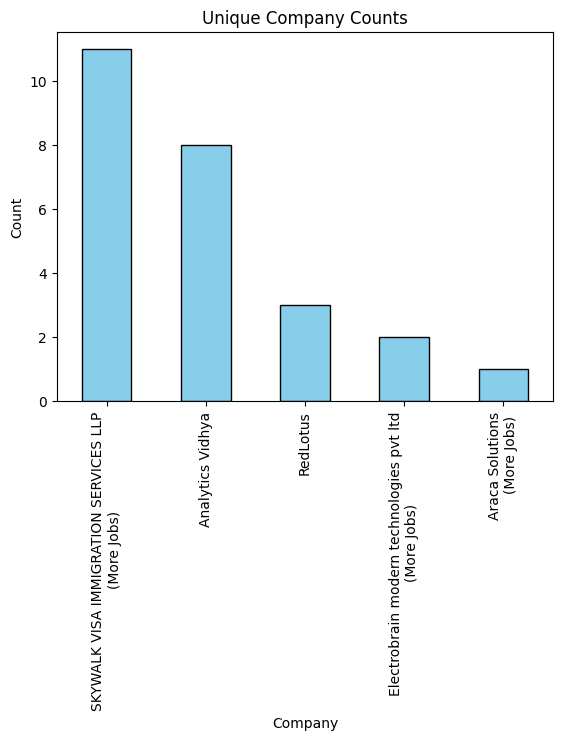

In [ ]:
company_counts = data['Company'].value_counts()
company_counts.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Unique Company Counts')

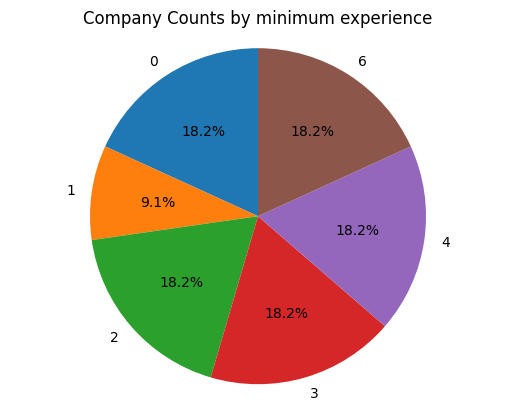

In [ ]:
minexp_counts = data.groupby('min_exp')['Company'].nunique()
plt.pie(minexp_counts, labels=minexp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Company Counts by minimum experience')
plt.axis('equal')
plt.show()